<a href="https://colab.research.google.com/github/Rizarumayantidewi/Advanced-Data-Mining/blob/main/sentlysis_apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Riza Rumayanti Dewi

**Student ID:** 20240130015

# Sentiment Analysis Project

## CRISP-DM


reference:
https://andiyudha.medium.com/crisp-dm-pendekatan-proses-dalam-data-mining-68bf8c2dc908

https://github.com/rainavyas/IMDB_Sentiment_Classification.git

# Businesss/Research Understanding

build a deep learning machine learning model to predict sentiment (positive, neutral, or negative) from user reviews of Apple products scraped from Twitter

Terms:
(bellow : use BERT, ELECTRA, and ROBERTA as the main algorithms.)
perform hyperparameter tuning for each model.
evaluate model performance using relevant metrics, such as accuracu and F1-score.

# Data Understanding

Training data,
if i used for naive bayes, LogisticRegression, RandomForestClassifier, SVC, Perceptron

### Load Dataset

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import seaborn as sns
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [126]:
# Load the uploaded file
file_path = "train.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info(), df.head()

data = pd.read_csv("train.csv", encoding='latin1')
data = data[['labels', 'tweets']]
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4757 entries, 0 to 4756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   labels  4757 non-null   float64
 1   tweets  4757 non-null   object 
dtypes: float64(1), object(1)
memory usage: 74.5+ KB


,0
labels,0
tweets,0


In [127]:
new_data = data.copy()
new_data['labels'] = new_data['labels'].map({'negative': -1, 'neutral': 0, 'positive': 1})
new_data.loc[new_data['labels'] == 'not_relevant', 'labels'] = 4

data['labels'].replace({'not_relevant': 4}, inplace=True)

<ipython-input-127-c73b1e9c0165>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['labels'].replace({'not_relevant': 4}, inplace=True)


<ipython-input-128-d2587ea98a98>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="labels",data=data, palette="Set1")


<Axes: xlabel='labels', ylabel='count'>

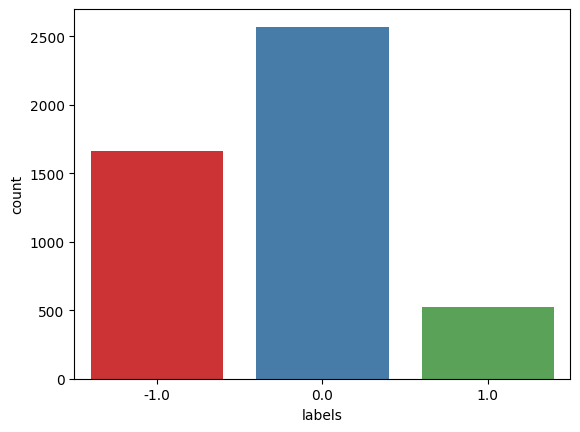

In [128]:
sns.countplot(x="labels",data=data, palette="Set1")

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import seaborn as sns
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'\W', ' ', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    tweet = re.sub(r'\S+@\S+', '', tweet)
    tokens = word_tokenize(tweet)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_tweet = ' '.join(tokens)
    return preprocessed_tweet

preprocessed_tweets = [preprocess_tweet(tweet) for tweet in data['tweets']]
data['tweets'] = preprocessed_tweets
data['tweets'].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,tweets
0,certified partnered business collaborated
1,tbh annoyed apple shit moment
2,new product innovative service lead barclays h...
3,patented iphone drop protection mechanism end ...
4,rt customer service success amp fails amp exam...


In [130]:
# Replace NaN values in the 'labels' column with a suitable integer
data['labels'] = data['labels'].fillna(0).astype(int)

In [131]:
X = data['tweets']
y = data['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [133]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron

classifiers = {
    'Naïve Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Perceptron': Perceptron()
}
log_reg = LogisticRegression(max_iter=1000)
classifiers['Logistic Regression'] = log_reg

In [134]:
print(y_train.value_counts())
print(y_test.value_counts())

labels
 0    2075
-1    1322
 1     408
Name: count, dtype: int64
labels
 0    495
-1    340
 1    117
Name: count, dtype: int64


In [135]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}
averages=['macro','micro']
for avg in averages:
    for clf_name, clf in classifiers.items():
        clf.fit(X_train_counts, y_train)
        y_pred = clf.predict(X_test_counts)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average=avg,zero_division=1)
        recall = recall_score(y_test, y_pred, average=avg)
        f1 = f1_score(y_test, y_pred, average=avg)
        results[(clf_name,avg)]= {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}

In [136]:
results_df = pd.DataFrame(results)
# I am Transposing the DataFrame to have classifiers as rows and metrics as columns
results_df = results_df.T
results_df['Feature Extraction Technique']='Bag of words based on raw counts'
results_df

,,Accuracy,Precision,Recall,F1,Feature Extraction Technique
Naïve Bayes,macro,0.771008,0.767712,0.682180,0.704741,Bag of words based on raw counts
Logistic Regression,macro,0.810924,0.839563,0.722464,0.758551,Bag of words based on raw counts
Random Forest,macro,0.801471,0.820209,0.705886,0.740683,Bag of words based on raw counts
SVM,macro,0.784664,0.833221,0.670900,0.709444,Bag of words based on raw counts
Perceptron,macro,0.792017,0.759375,0.736090,0.746452,Bag of words based on raw counts
Naïve Bayes,micro,0.771008,0.771008,0.771008,0.771008,Bag of words based on raw counts
Logistic Regression,micro,0.810924,0.810924,0.810924,0.810924,Bag of words based on raw counts
Random Forest,micro,0.813025,0.813025,0.813025,0.813025,Bag of words based on raw counts
SVM,micro,0.784664,0.784664,0.784664,0.784664,Bag of words based on raw counts
Perceptron,micro,0.792017,0.792017,0.792017,0.792017,Bag of words based on raw counts


BERT

test data implementation

In [137]:
import pandas as pd
import torch
import transformers
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam
from tqdm import tqdm

In [138]:
# Load dataset
df = pd.read_csv("test.csv", encoding='latin1')
df = df[['tweets']]
df.dropna(inplace=True)

def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'\W', ' ', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    return tweet

df['tweets'] = df['tweets'].apply(preprocess_tweet)


In [139]:
# Split data
X_train, X_test = train_test_split(df['tweets'], test_size=0.2, random_state=42)

In [140]:
# Tokenization
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128)

In [141]:
# Convert to tensors
test_inputs = torch.tensor(test_encodings['input_ids'])
test_labels = torch.tensor(y_test[:len(X_test)].values)
# Create DataLoader
test_data = TensorDataset(test_inputs, test_labels)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

In [142]:
# Load BERT Model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = Adam(model.parameters(), lr=2e-5)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch
from tqdm import tqdm
from torch.optim import Adam

# Assuming your original labels are -1, 0, 1
label_mapping = {-1: 0, 0: 1, 1: 2}  # Map -1 to 0, 0 to 1, 1 to 2

# Load Dataset
# ... (your code to load train.csv and test.csv) ...

# Training Loop
epochs = 3
for epoch in range(epochs):
    model.train()
    loop = tqdm(test_loader, leave=True)
    for batch in loop:
        inputs, labels = batch  # Assuming your batch contains (input_ids, labels)

        # Map labels before moving to device
        labels = torch.tensor([label_mapping[label.item()] for label in labels])

        # Move tensors to the device
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Call the model with correct arguments
        outputs = model(inputs, labels=labels)

        loss = outputs.loss
        loss.backward()
        optimizer.step()
        loop.set_description(f'Epoch {epoch}')
        loop.set_postfix(loss=loss.item())

Epoch 3:  60%|██████    | 9/15 [00:55<00:36,  6.15s/it, loss=1.01]

In [ ]:
# Evaluation
model.eval()
preds = []
true_labels = []
with torch.no_grad():
    for batch in test_loader:
        inputs, labels = [b.to(device) for b in batch]
        outputs = model(inputs)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        preds.extend(predictions.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

print(classification_report(true_labels, preds))
print("Accuracy:", accuracy_score(true_labels, preds))

# **my draft to try other algorithms**

In [ ]:
!pip install transformers datasets torch scikit-learn nltk tqdm

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import transformers
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
from datasets import Dataset
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_scheduler

# Download stopwords and punkt_tab
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Add this line to download the required data

stop_words = set(stopwords.words('english'))

# Gunakan GPU jika tersedia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
def load_data(train_path, test_path):
    train_df = pd.read_csv(train_path, header=None, names=['tweets', 'labels'])  # Set header to None
    test_df = pd.read_csv(test_path, header=None, names=['tweets', 'labels'])  # Set header to None
    return train_df, test_df

train_path = "train.csv"
test_path = "test.csv"

train_df, test_df = load_data(train_path, test_path)

In [ ]:
def clean_text(text):
    # Check if text is a string, handle float (e.g., NaN)
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Hapus URL
        text = re.sub(r'\@\w+|\#','', text)  # Hapus mention dan hashtag
        text = re.sub(r'[^A-Za-z0-9 ]+', '', text)  # Hapus karakter spesial
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stop_words]  # Hapus stopwords
        return " ".join(tokens)
    else:  # If not a string (e.g., float), return an empty string or handle as needed
        # Return a placeholder string instead of an empty string
        return "placeholder"

# Terapkan preprocessing
# Access the correct column in train_df (column with index 0)
train_df[train_df.columns[0]] = train_df[train_df.columns[0]].apply(clean_text)

# Assuming 'labels' is the second column in train_df:
train_df['labels'] = train_df[train_df.columns[1]].map({-1: 0, 0: 1, 1: 2}) # Change to create a 'labels' column

# Access the correct column in test_df ('tweets')
test_df['tweets'] = test_df['tweets'].apply(clean_text)

# Assuming 'labels' is the second column in test_df as well:
test_df['labels'] = test_df[test_df.columns[0]].map({-1: 0, 0: 1, 1: 2}) # Change to create a 'labels' column


In [ ]:
# Pilih model yang ingin digunakan: BERT, ELECTRA, atau RoBERTa
model_name = "bert-base-uncased"  # Bisa diganti dengan "google/electra-small-discriminator" atau "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(example):
    return tokenizer(example["tweet"], padding="max_length", truncation=True, max_length=128)

# Tokenisasi dataset
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Konversi dataset ke PyTorch DataLoader
train_dataset.set_format(type="torch", columns=["labels"])
test_dataset.set_format(type="torch", columns=["labels"])

train_loader = DataLoader(train_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

print(len(train_dataset))
print(train_dataset.features)


In [ ]:
# Pilih model yang ingin digunakan: BERT, ELECTRA, atau RoBERTa
model_name = "roberta-base"  # Bisa diganti dengan "google/electra-small-discriminator" atau "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(example):
    return tokenizer(example["tweet"], padding="max_length", truncation=True, max_length=128)

# Tokenisasi dataset
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Konversi dataset ke PyTorch DataLoader
train_dataset.set_format(type="torch", columns=["labels"])
test_dataset.set_format(type="torch", columns=["labels"])

train_loader = DataLoader(train_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

print(len(train_dataset))
print(train_dataset.features)


In [ ]:
# Pilih model yang ingin digunakan: BERT, ELECTRA, atau RoBERTa
model_name = "google/electra-small-discriminator"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(example):
    return tokenizer(example["tweet"], padding="max_length", truncation=True, max_length=128)

# Tokenisasi dataset
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Konversi dataset ke PyTorch DataLoader
train_dataset.set_format(type="torch", columns=["labels"])
test_dataset.set_format(type="torch", columns=["labels"])

train_loader = DataLoader(train_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

print(len(train_dataset))
print(train_dataset.features)


In [ ]:
# Load Model
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)
model.to(device)

# Optimizer & Loss Function
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = nn.CrossEntropyLoss()

# Scheduler
num_training_steps = len(train_loader) * 3
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Training Loop
epochs = 3
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    num_batches = 0  # Initialize a counter for the number of batches
    for batch in tqdm(train_loader):
        inputs = {key: batch[key].to(device) for key in ["input_ids", "attention_mask"]}
        labels = batch["labels"].to(device)

        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = loss_fn(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        lr_scheduler.step()

        running_loss += loss.item()
        num_batches += 1  # Increment the batch counter

    # Check if num_batches is 0 before dividing
    if num_batches > 0:
        print(f"Epoch {epoch+1}: Loss = {running_loss / num_batches:.4f}")
    else:
        print(f"Epoch {epoch+1}: Loss = No batches in train_loader")

In [ ]:
print("Dataset columns:", test_dataset.column_names)

In [ ]:
all_preds = []
all_labels = []

for batch in test_loader:
    print("Processing batch...")  # Debugging
    inputs = {key: val.to(device) for key, val in batch.items() if key in ["input_ids", "attention_mask"]}

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)

    all_preds.extend(predictions.cpu().numpy())
    all_labels.extend(batch["labels"].cpu().numpy())

print("Total Predictions:", len(all_preds))
print("Total Labels:", len(all_labels))


In [ ]:
print("Total samples in test_loader:", len(test_loader.dataset))


In [ ]:
# Evaluasi model
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in tqdm(test_loader):
        inputs = {key: batch[key].to(device) for key in ["input_ids", "attention_mask"]}
        labels = batch["labels"].to(device)

        outputs = model(**inputs)
        preds = torch.argmax(outputs.logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Hasil evaluasi
accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(all_labels, all_preds, target_names=["Negative", "Neutral", "Positive"]))


In [ ]:
model.save_pretrained("sentiment_model")
tokenizer.save_pretrained("sentiment_model")
print("Model saved successfully!")

In [ ]:
pip install transformers datasets --upgrade

In [ ]:
!pip install datasets

In [ ]:
pip install --upgrade nltk

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
from datasets import Dataset

# Load Dataset
def load_data(train_path, test_path):
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    return train_df, test_df

train_path = "train.csv"
test_path = "test.csv"

train_df, test_df = load_data(train_path, test_path)

In [ ]:
# Preprocessing Data
def preprocess_data(df):
    df = df[['tweets', 'labels']].dropna()
    df['labels'] = df['labels'].map({-1: 0, 0: 1, 1: 2})  # Re-map labels for compatibility
    return df

train_df = pd.read_csv(train_path, header=None, names=['tweet', 'labels'])
test_df = pd.read_csv(test_path, header=None, names=['tweet', 'labels'])

# Convert to HuggingFace Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

print(train_df.head())
print(test_df.head())

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data1 = pd.read_csv("train.csv", header=None, names=['tweet', 'labels'])
data2 = pd.read_csv("test.csv", header=None, names=['tweet', 'labels'])

# Remap labels to sentiment categories
sentiment_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
data1['sentiment'] = data1['labels'].map(sentiment_mapping)
data2['sentiment'] = data2['labels'].map(sentiment_mapping)

# Calculate sentiment counts
sentiment_counts1 = data1['sentiment'].value_counts().sort_index()
sentiment_counts2 = data2['sentiment'].value_counts().sort_index()

# Create the bar plot for data1 (train data)
plt.figure(figsize=(10, 5))
sns.barplot(x=sentiment_counts1.index, y=sentiment_counts1.values, palette="pastel")
plt.xlabel("Sentiment")
plt.ylabel("Count of Tweets")
plt.title("Train Data: Tweet Sentiment Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate the bars with their values
for i, v in enumerate(sentiment_counts1.values):
    plt.text(i, v + 10, str(v), ha='center')

plt.show()

# Create the bar plot for data2 (test data)
plt.figure(figsize=(10, 5))
sns.barplot(x=sentiment_counts2.index, y=sentiment_counts2.values, palette="pastel")
plt.xlabel("Sentiment")
plt.ylabel("Count of Tweets")
plt.title("Test Data: Tweet Sentiment Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate the bars with their values
for i, v in enumerate(sentiment_counts2.values):
    plt.text(i, v + 10, str(v), ha='center')

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load data (ganti dengan path file Anda)
df = pd.read_csv("data_ulasan.csv")

# Konversi kolom tanggal ke format datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

# Kelompokkan data berdasarkan minggu dan hitung jumlah data per minggu
weekly_data = df.groupby(pd.Grouper(key='tanggal', freq='W')).size().reset_index(name='jumlah_data')

# Visualisasi jumlah data per minggu
plt.figure(figsize=(10, 5))
sns.barplot(x='tanggal', y='jumlah_data', data=weekly_data, palette='pastel')
plt.xlabel('Minggu')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Minggu')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Preprocessing teks untuk menghitung frekuensi kata
def preprocess_text(text):
    # Tokenisasi
    words = word_tokenize(text)
    # Hapus stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return words

# Tokenisasi dan hitung frekuensi kata
all_words = []
for ulasan in df['ulasan']:
    words = preprocess_text(ulasan)
    all_words.extend(words)

# Hitung frekuensi kata
word_freq = pd.Series(all_words).value_counts()[:15]

# Visualisasi frekuensi kata
plt.figure(figsize=(10, 5))
sns.barplot(x=word_freq.index, y=word_freq.values, palette='pastel')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Frekuensi Kata Terbanyak')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual data)
data = {'Week': ['11-Nov-24', '18-Nov-24', '25-Nov-24', '02-Dec-24', '09-Dec-24', '16-Dec-24'],
        'Data Count': [500, 800, 550, 600, 1500, 2000]}
df = pd.DataFrame(data)

# Create the bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Week', y='Data Count', data=df, palette='pastel')
plt.title('Number of Data Per Week')
plt.xlabel('Weeks')
plt.ylabel('Data Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate the bars with their values
for i, v in enumerate(df['Data Count']):
    plt.text(i, v + 10, str(v), ha='center')

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual word frequency data)
data = {'Word': ['baik', 'toko', 'belanja', 'produk', 'cepat', 'mudah', 'terima', 'kualitas', 'barang', 'puas', 'cepat', 'respon', 'toko', 'terima', 'kasih'],
        'Word Count': [2000, 1500, 1200, 1100, 1000, 900, 800, 750, 700, 650, 600, 550, 500, 450, 400]}
df = pd.DataFrame(data)

# Create the bar plot
plt.figure(figsize=(15, 5))
sns.barplot(x='Word', y='Word Count', data=df, palette='pastel')
plt.title('Word Frequency')
plt.xlabel('15 Frequently Occurring Words')
plt.ylabel('Word Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate the bars with their values
for i, v in enumerate(df['Word Count']):
    plt.text(i, v + 10, str(v), ha='center')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

# Data Preparation

In [ ]:
import shutil
import nltk

# Hapus folder nltk_data
shutil.rmtree('/root/nltk_data', ignore_errors=True)

# Unduh ulang stopwords
nltk.download('stopwords')

In [ ]:
print(train_df.columns)  # Check column names in train_df
print(test_df.columns)   # Check column names in test_df

In [ ]:
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

In [ ]:
# Lihat beberapa baris pertama dari dataset untuk memverifikasi kolom
print(train_df.head())

In [ ]:
from datasets import Dataset
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing Data
def preprocess_data(df):
    df = df[['tweets', 'labels']].dropna()
    df['labels'] = df['labels'].map({-1: 0, 0: 1, 1: 2})  # Re-map labels for compatibility
    return df

In [ ]:
print(train_df.head())  # Menampilkan beberapa baris pertama dari dataset train_df
print(test_df.head())   # Menampilkan beberapa baris pertama dari dataset test_df


# Modelling

ELECTRA

In [ ]:
model_name1 = "google/electra-small-discriminator"  # ELECTRA model
tokenizer = AutoTokenizer.from_pretrained(model_name1)
model_electra = AutoModelForSequenceClassification.from_pretrained(model_name1, num_labels=3)

BERT

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "bert-base-uncased"  # BERT model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

ROBERTA

In [ ]:
model_name2 = "roberta-base"  # RoBERTa model
tokenizer = AutoTokenizer.from_pretrained(model_name2)
model_roberta = AutoModelForSequenceClassification.from_pretrained(model_name2, num_labels=3)

Hyperparameter tuning

In [ ]:
!pip install optuna

In [ ]:
import optuna
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch

# Load Dataset (pastikan data sudah siap)
train_df, test_df = load_data(train_path, test_path)
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Tokenize dataset
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['tweets'], padding="max_length", truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Define Optuna Objective Function
def objective(trial):
    # Hyperparameters to tune
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-6, 1e-4)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
    num_train_epochs = trial.suggest_int('num_train_epochs', 3, 5)

    # Model and Trainer
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

    # Set training arguments
    training_args = TrainingArguments(
        output_dir='./results',
        evaluation_strategy="epoch",
        learning_rate=learning_rate,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        num_train_epochs=num_train_epochs,
        weight_decay=0.01,
        logging_dir='./logs',
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset
    )

    trainer.train()

    # Evaluate the model on the test set
    eval_result = trainer.evaluate()
    return eval_result['eval_loss']

# Create Optuna study and optimize the hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Print the best hyperparameters
print(f"Best hyperparameters: {study.best_params}")

# Evaluation

In [ ]:
from sklearn.metrics import classification_report

# Evaluate predictions
predictions = trainer.predict(test_dataset)
pred_labels = predictions.predictions.argmax(axis=1)
true_labels = test_dataset["labels"]

print(classification_report(true_labels, pred_labels, target_names=["Negative", "Neutral", "Positive"]))

# Deployment

In [ ]:
model.save_pretrained("sentiment_model")
tokenizer.save_pretrained("sentiment_model")